In [604]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [605]:
cust=pd.read_csv("customer_churn.csv")

In [606]:
cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [607]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [608]:
cust.pop("customerID")

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [609]:
cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [610]:
cust.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [611]:
cust.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [612]:
try:
    pd.to_numeric(cust.TotalCharges)
except Exception as e:
    print(e)   #this occured because there was a blank space in 488th index

Unable to parse string " " at position 488


In [613]:
pd.to_numeric(cust.TotalCharges,errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [614]:
cust["TotalCharges"].isnull().sum()

0

In [615]:
cust.iloc[488]["TotalCharges"]

' '

In [616]:
cust.shape

(7043, 20)

In [617]:
cust=cust[cust.TotalCharges!=" "]

In [618]:
cust.shape

(7032, 20)

In [619]:
#spaces or blank spaces have been removes so lets again do it
try:
    pd.to_numeric(cust.TotalCharges)
except Exception as e:
    print(e)

In [620]:
cust["TotalCharges"]=cust["TotalCharges"].apply(lambda x:pd.to_numeric(x))

C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\515050792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust["TotalCharges"]=cust["TotalCharges"].apply(lambda x:pd.to_numeric(x))


In [621]:
cust.dtypes   #the data type of TotalCharges has been changed into float

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [622]:
cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [623]:
no=cust[cust.Churn=="No"].tenure
yes=cust[cust.Churn=="Yes"].tenure

In [624]:
yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [625]:
no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

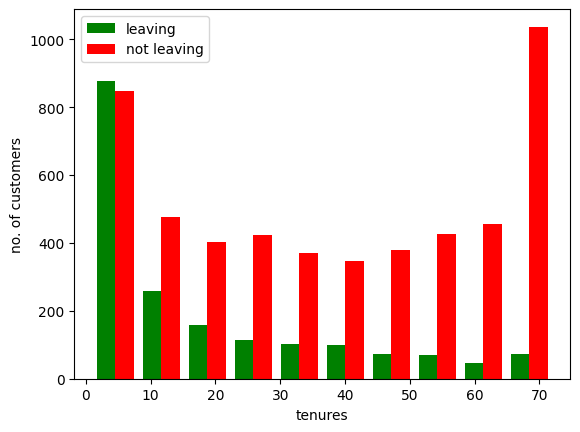

In [626]:
plt.xlabel("tenures")
plt.ylabel("no. of customers")
plt.hist([yes,no],color=["green","red"],label=["leaving","not leaving"])
plt.legend()

In [627]:
#we can surely see the trend

In [628]:
for column in cust.columns:  #this is for label encoding
    print(f"{column}   :{cust[column].unique()}")

gender   :['Female' 'Male']
SeniorCitizen   :[0 1]
Partner   :['Yes' 'No']
Dependents   :['No' 'Yes']
tenure   :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   :['No' 'Yes']
MultipleLines   :['No phone service' 'No' 'Yes']
InternetService   :['DSL' 'Fiber optic' 'No']
OnlineSecurity   :['No' 'Yes' 'No internet service']
OnlineBackup   :['Yes' 'No' 'No internet service']
DeviceProtection   :['No' 'Yes' 'No internet service']
TechSupport   :['No' 'Yes' 'No internet service']
StreamingTV   :['No' 'Yes' 'No internet service']
StreamingMovies   :['No' 'Yes' 'No internet service']
Contract   :['Month-to-month' 'One year' 'Two year']
PaperlessBilling   :['Yes' 'No']
PaymentMethod   :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   :[29.85 56.95 53.85 

In [629]:
cust["MultipleLines"]=cust["MultipleLines"].apply(lambda x:x[:2] if x=="No phone service" else x)
# we can also do this by using this replace function
cust.replace("No phone service","No",inplace=True)

C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\2682622116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust["MultipleLines"]=cust["MultipleLines"].apply(lambda x:x[:2] if x=="No phone service" else x)
C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\2682622116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust.replace("No phone service","No",inplace=True)


In [630]:
cust["MultipleLines"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042     No
Name: MultipleLines, Length: 7032, dtype: object

In [631]:
for column in cust.columns:  #this is for label encoding
    print(f"{column}   :{cust[column].unique()}")

gender   :['Female' 'Male']
SeniorCitizen   :[0 1]
Partner   :['Yes' 'No']
Dependents   :['No' 'Yes']
tenure   :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   :['No' 'Yes']
MultipleLines   :['No' 'Yes']
InternetService   :['DSL' 'Fiber optic' 'No']
OnlineSecurity   :['No' 'Yes' 'No internet service']
OnlineBackup   :['Yes' 'No' 'No internet service']
DeviceProtection   :['No' 'Yes' 'No internet service']
TechSupport   :['No' 'Yes' 'No internet service']
StreamingTV   :['No' 'Yes' 'No internet service']
StreamingMovies   :['No' 'Yes' 'No internet service']
Contract   :['Month-to-month' 'One year' 'Two year']
PaperlessBilling   :['Yes' 'No']
PaymentMethod   :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   :[29.85 56.95 53.85 ... 63.1  44.2  78.

In [632]:
#lets change all the values in label encoded form
cust.replace("No internet service","No",inplace=True)
cust.replace("No internet service","No",inplace=True)

C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\3940094752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust.replace("No internet service","No",inplace=True)
C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\3940094752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust.replace("No internet service","No",inplace=True)


In [633]:
for column in cust.columns:  #this is for label encoding
    print(f"{column}   :{cust[column].unique()}")

gender   :['Female' 'Male']
SeniorCitizen   :[0 1]
Partner   :['Yes' 'No']
Dependents   :['No' 'Yes']
tenure   :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   :['No' 'Yes']
MultipleLines   :['No' 'Yes']
InternetService   :['DSL' 'Fiber optic' 'No']
OnlineSecurity   :['No' 'Yes']
OnlineBackup   :['Yes' 'No']
DeviceProtection   :['No' 'Yes']
TechSupport   :['No' 'Yes']
StreamingTV   :['No' 'Yes']
StreamingMovies   :['No' 'Yes']
Contract   :['Month-to-month' 'One year' 'Two year']
PaperlessBilling   :['Yes' 'No']
PaymentMethod   :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   :['No' 'Yes']


In [634]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    cust[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\1591800531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust[col].replace({'Yes': 1,'No': 0},inplace=True)


In [635]:
cust.replace("Female",0,inplace=True)
cust.replace("Male",1,inplace=True)

C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\146087909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust.replace("Female",0,inplace=True)
C:\Users\DS002\AppData\Local\Temp\ipykernel_11812\146087909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust.replace("Male",1,inplace=True)


In [636]:
for column in cust.columns:  #this is for label encoding
    print(f"{column}   :{cust[column].unique()}")

gender   :[0 1]
SeniorCitizen   :[0 1]
Partner   :[1 0]
Dependents   :[0 1]
tenure   :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   :[0 1]
MultipleLines   :[0 1]
InternetService   :['DSL' 'Fiber optic' 'No']
OnlineSecurity   :[0 1]
OnlineBackup   :[1 0]
DeviceProtection   :[0 1]
TechSupport   :[0 1]
StreamingTV   :[0 1]
StreamingMovies   :[0 1]
Contract   :['Month-to-month' 'One year' 'Two year']
PaperlessBilling   :[1 0]
PaymentMethod   :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   :[0 1]


In [637]:
#now for few columns we need one hot encoding or dummy variable
pd.get_dummies(cust,columns=["InternetService"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,0,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [638]:
cust.columns.value_counts().sum()

20

In [639]:
cust=pd.get_dummies(cust,columns=["InternetService","Contract","PaymentMethod"])

In [640]:
cust.columns.value_counts().sum()

27

In [641]:
cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [642]:
for column in cust.columns:  #this is for label encoding
    print(f"{column}   :{cust[column].unique()}")

gender   :[0 1]
SeniorCitizen   :[0 1]
Partner   :[1 0]
Dependents   :[0 1]
tenure   :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   :[0 1]
MultipleLines   :[0 1]
OnlineSecurity   :[0 1]
OnlineBackup   :[1 0]
DeviceProtection   :[0 1]
TechSupport   :[0 1]
StreamingTV   :[0 1]
StreamingMovies   :[0 1]
PaperlessBilling   :[1 0]
MonthlyCharges   :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   :[0 1]
InternetService_DSL   :[1 0]
InternetService_Fiber optic   :[0 1]
InternetService_No   :[0 1]
Contract_Month-to-month   :[1 0]
Contract_One year   :[0 1]
Contract_Two year   :[0 1]
PaymentMethod_Bank transfer (automatic)   :[0 1]
PaymentMethod_Credit card (automatic)   :[0 1]
PaymentMethod_Electronic check   :[1 0]
PaymentMethod_Mailed c

In [643]:
cust.dtypes  #everything is numbered

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [644]:
#since three columns 'tenure','MonthlyCharges','TotalCharges' are not scaled we will scale it
from sklearn.preprocessing import MinMaxScaler

In [645]:
mx=MinMaxScaler()

In [646]:
cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [647]:
cols=['tenure','MonthlyCharges','TotalCharges']
cust[cols]=mx.fit_transform(cust[cols])

In [648]:
cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [649]:

for column in cust.columns:  #this is for label encoding
    print(f"{column}   :{cust[column].unique()}")

#now data is cleaned and scaled



gender   :[0 1]
SeniorCitizen   :[0 1]
Partner   :[1 0]
Dependents   :[0 1]
tenure   :[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService   :[0 1]
MultipleLines   :[0 1]
OnlineSecurity   :[0 1]
OnlineBackup   :[1 0]
DeviceProtection   :

In [650]:
x=cust.drop("Churn",axis=1)
y=cust["Churn"]

In [651]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [652]:
y


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [653]:
#now lets implement training and testing since we have got x and y cordinates
from sklearn.model_selection import train_test_split

In [654]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [655]:
ytrain

5664    1
101     0
2621    0
392     0
1327    1
       ..
3051    0
1730    1
4086    0
2259    0
2920    0
Name: Churn, Length: 5625, dtype: int64

In [656]:
len(xtrain.columns)

26

In [657]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
     
     ])

In [658]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [659]:
model.fit(xtrain,ytrain,epochs=500)

Epoch 1/500
176/176 [==============================] - 1s 1ms/step - loss: 0.5058 - accuracy: 0.7607
Epoch 2/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.7915
Epoch 3/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.7959
Epoch 4/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8039
Epoch 5/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8027
Epoch 6/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8053
Epoch 7/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8052
Epoch 8/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8075
Epoch 9/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8078
Epoch 10/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4079 - accura

In [660]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7676


[0.4891071021556854, 0.7675906419754028]

In [661]:
ypred=model.predict(xtest)

44/44 [==============================] - 0s 808us/step


In [662]:
ypred

array([[0.27768946],
       [0.6138073 ],
       [0.00115473],
       ...,
       [0.6441421 ],
       [0.60191005],
       [0.6529638 ]], dtype=float32)

In [663]:
ytest

2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn, Length: 1407, dtype: int64

In [664]:
ypred=[i[0] for i in ypred]

In [665]:
ypred

[0.27768946,
 0.6138073,
 0.0011547343,
 0.72991025,
 0.53394026,
 0.82377964,
 0.011133819,
 0.4784019,
 0.16340311,
 0.09274576,
 0.21977097,
 0.7340023,
 0.13856287,
 0.59421647,
 0.7140059,
 0.1646708,
 0.02635391,
 0.14890634,
 0.005381004,
 0.49145216,
 0.0011247966,
 0.34828588,
 0.080245964,
 0.014702928,
 0.010977848,
 0.359354,
 0.008198415,
 0.24810725,
 0.26116934,
 0.0025719188,
 0.2879738,
 0.4286346,
 0.007593265,
 0.0835091,
 0.0011488453,
 0.32703212,
 0.6928942,
 0.061844286,
 0.95728207,
 0.2937392,
 0.8654743,
 0.44345608,
 0.03396532,
 0.007114982,
 0.26259264,
 0.0044921683,
 0.09897454,
 0.14788963,
 0.34750798,
 0.62321645,
 0.39414495,
 0.46884438,
 0.0051683397,
 0.7851991,
 0.42989603,
 0.045707665,
 0.0011738111,
 0.84254295,
 0.3258866,
 0.08326179,
 0.0095948735,
 0.23463215,
 0.006018026,
 0.60964954,
 0.2389998,
 0.011692867,
 0.01935783,
 0.12795566,
 0.15693277,
 0.6120767,
 0.006355553,
 0.7735273,
 0.43455246,
 0.5571308,
 0.07696688,
 0.18423346,
 0

In [666]:
y_pred = []
for element in ypred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [667]:
ypred=y_pred

In [668]:
ypred

[0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [669]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [670]:
cm=confusion_matrix(ytest,ypred)

In [671]:
accuracy_score(ytest,ypred)

0.767590618336887

In [672]:
#pretty good accuracy

In [673]:
import seaborn as sns


Text(95.72222222222221, 0.5, 'Truth')

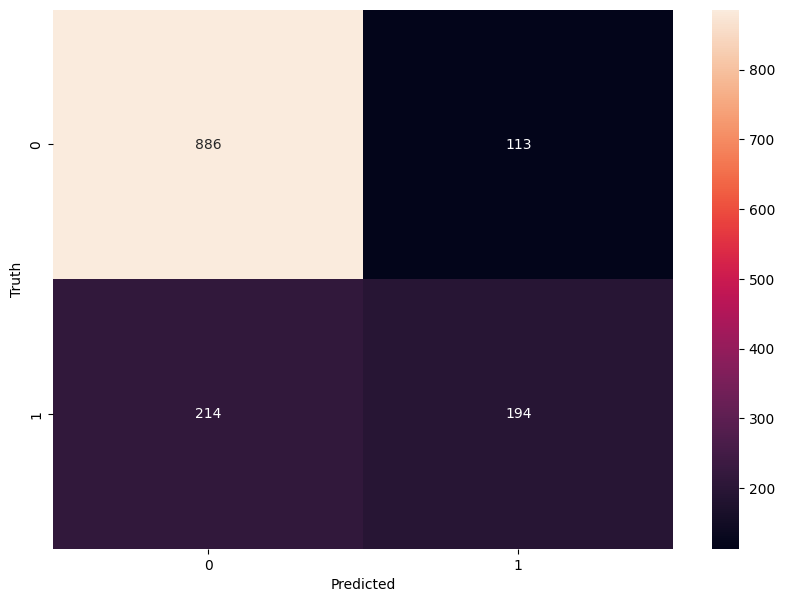

In [674]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')